In [55]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import missingno
%matplotlib inline
import IPython
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
shooting_data = pd.read_csv('shootings_datset.csv')
shooting_data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,1/2/2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,1/4/2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,1/4/2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,6/12/2020,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,6/12/2020,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,6/13/2020,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,6/13/2020,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [45]:
# Group and sort the data by Country
# df_by_country = df.groupby(by="Country").count().reset_index().sort_values(by="Year", ascending=False).reset_index(drop=True)

# Create a treemap for the top Countries
# fig3 = px.treemap(df_by_country[:100], path=["Country", "Year"],
#                  values="Life expectancy ",
#                  labels={"Life expectancy "})
# fig3.show()

In [19]:
# separating  and y 
#separate the  the names columns from the others columns which are dependent on the names columns
dependant_columns = df.drop('name', axis = 1)
names_column = df['name']

In [21]:
# displaying x
dependant_columns

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,1/2/2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,1/2/2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,1/3/2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,1/4/2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,1/4/2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,6/12/2020,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,6/12/2020,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,6/13/2020,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,6/13/2020,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [24]:
names_column

0               Tim Elliot
1         Lewis Lee Lembke
2       John Paul Quintero
3          Matthew Hoffman
4        Michael Rodriguez
               ...        
4890       Rayshard Brooks
4891        Caine Van Pelt
4892          Hannah Fizer
4893        William Slyter
4894        Nicholas Hirsh
Name: name, Length: 4895, dtype: object

In [35]:
# displaying entire dataset
shooting_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

In [36]:
# Analysing dataset and saving to html file
analyze_report = sv.analyze(shooting_data)
analyze_report.show_html('shootings_analysis.html', open_browser = False)

                                             |          | [  0%]   00:00 -> (? left)

Report shootings_analysis.html was generated.



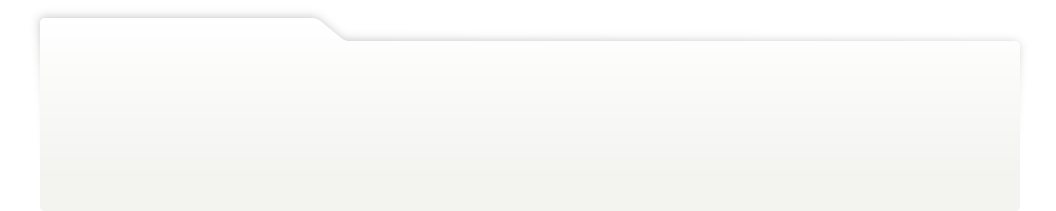
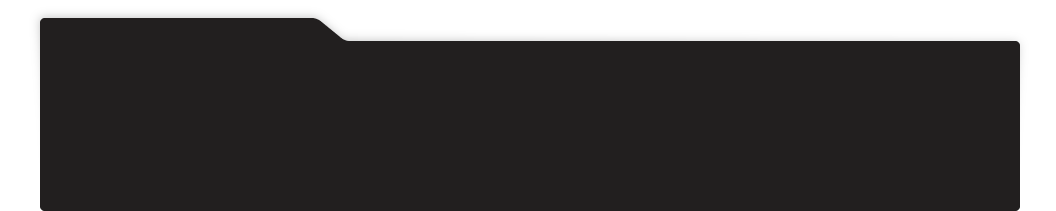
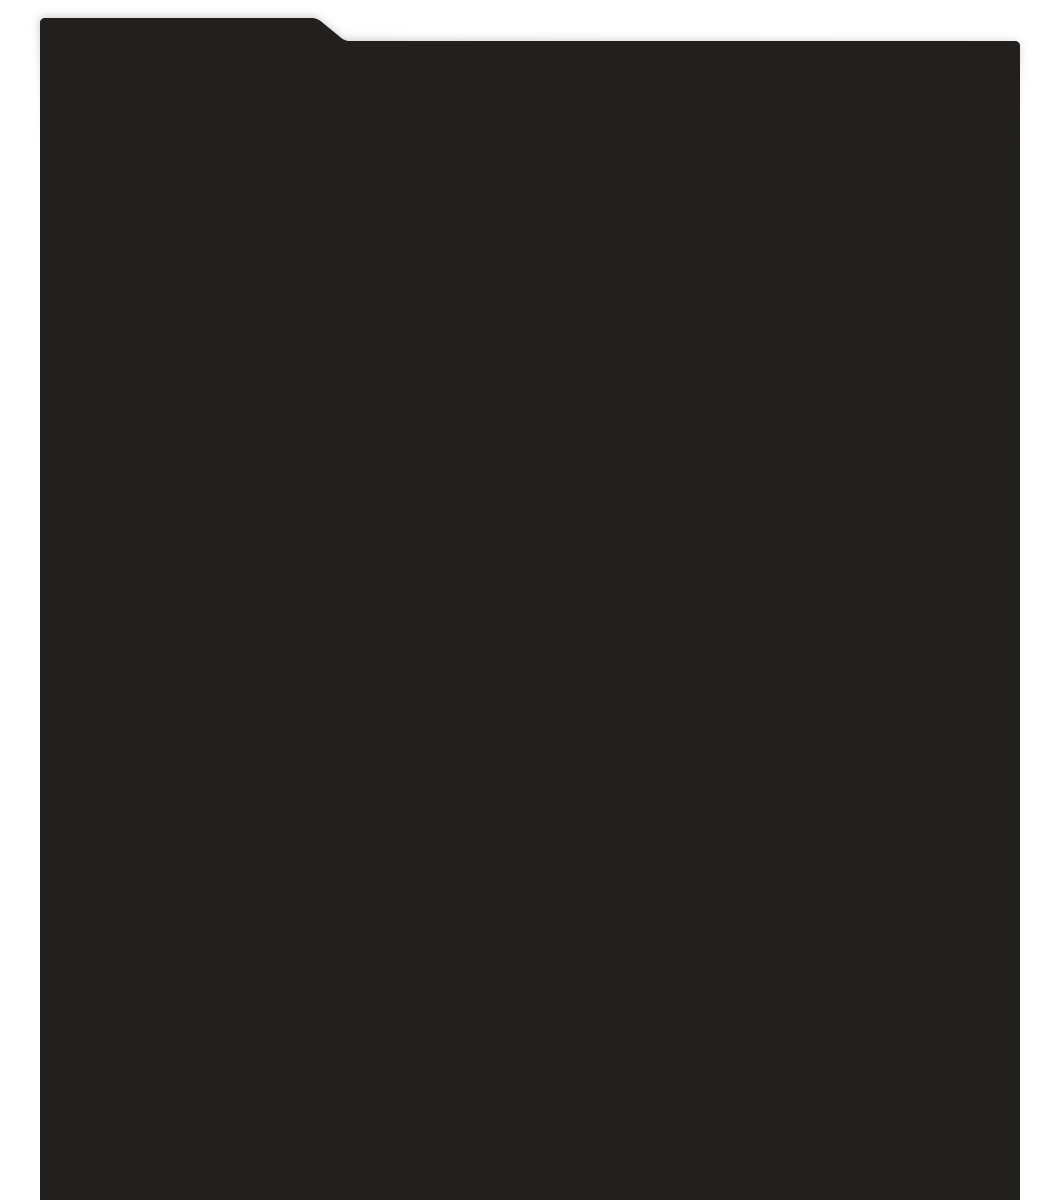
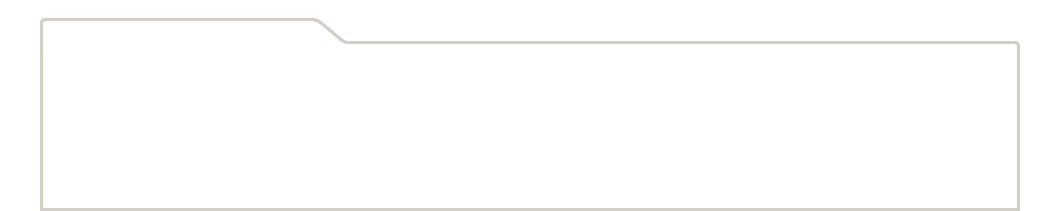
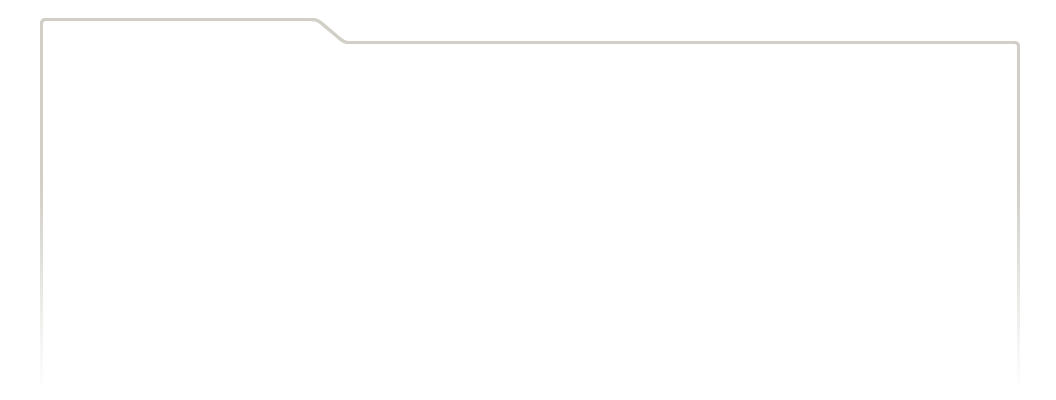
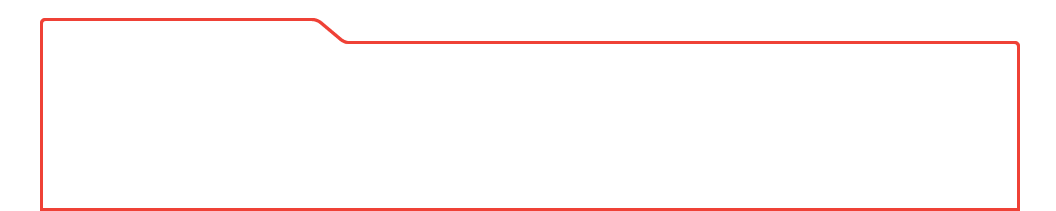
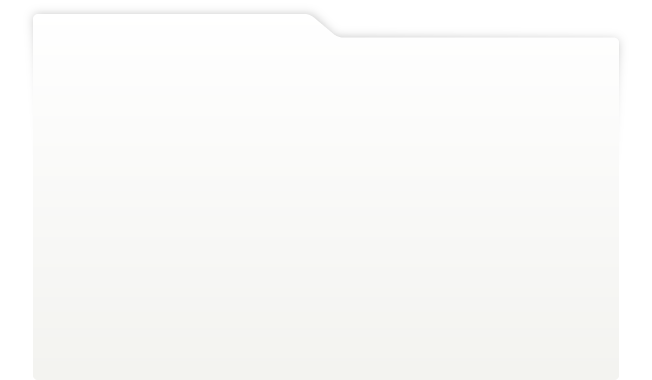
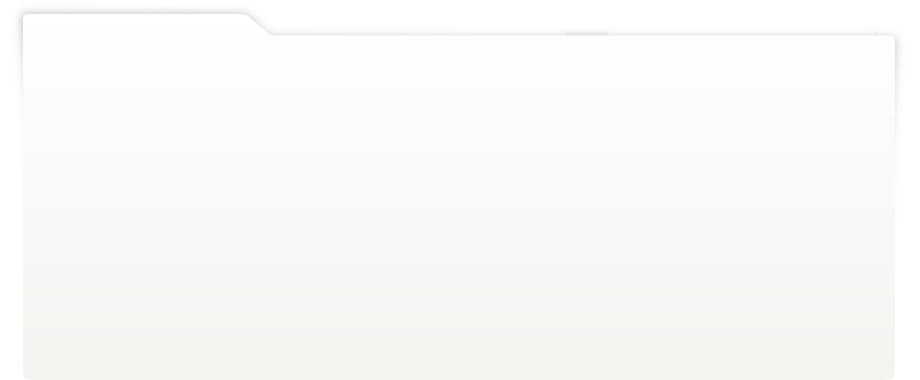
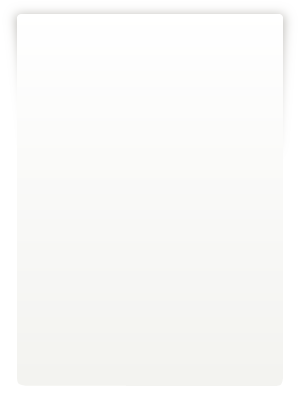
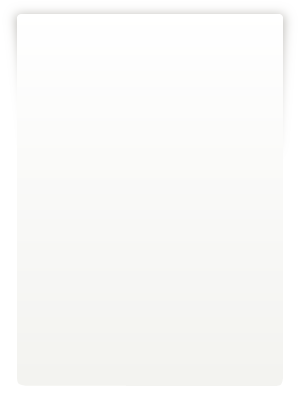
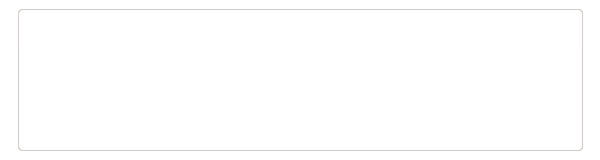
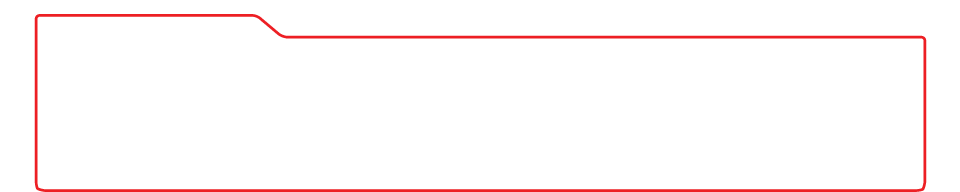
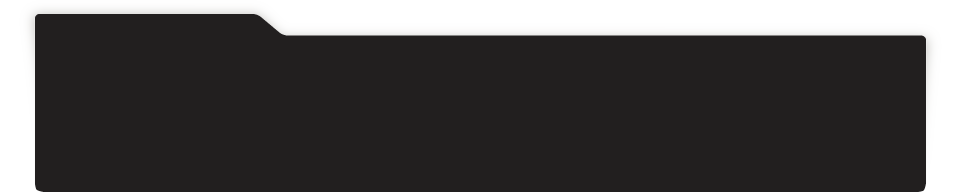
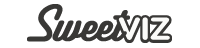
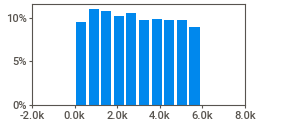
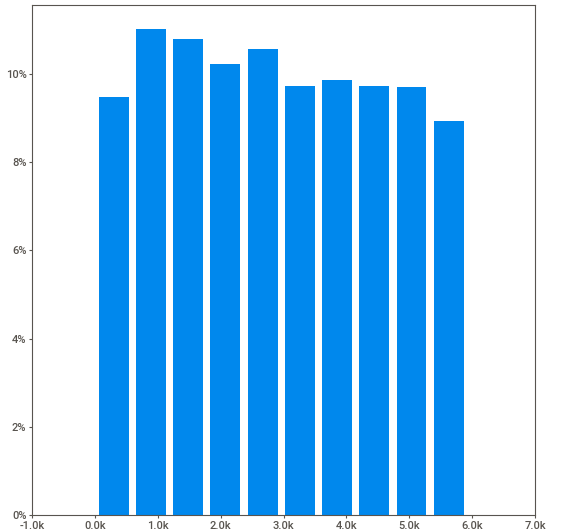
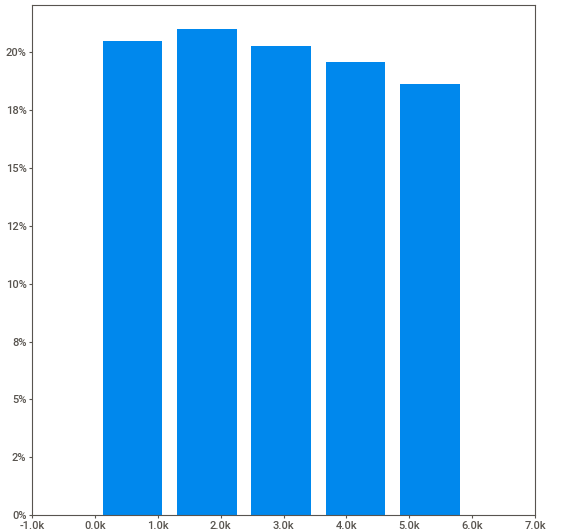
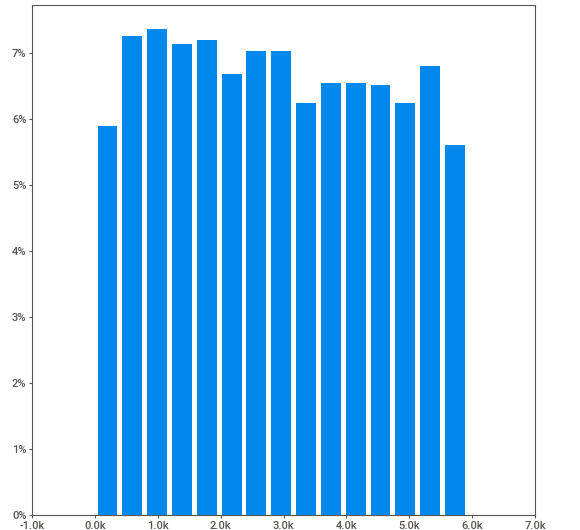
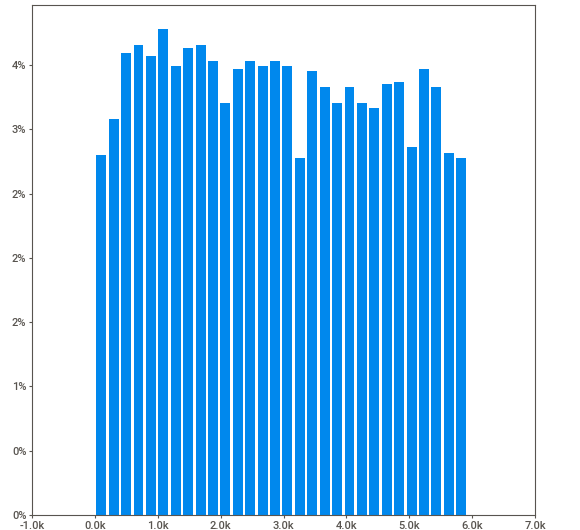
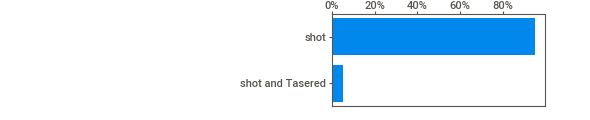
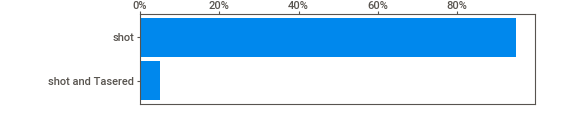
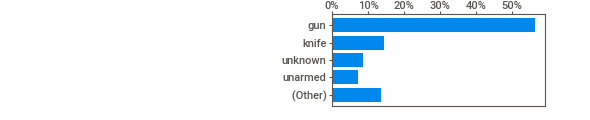
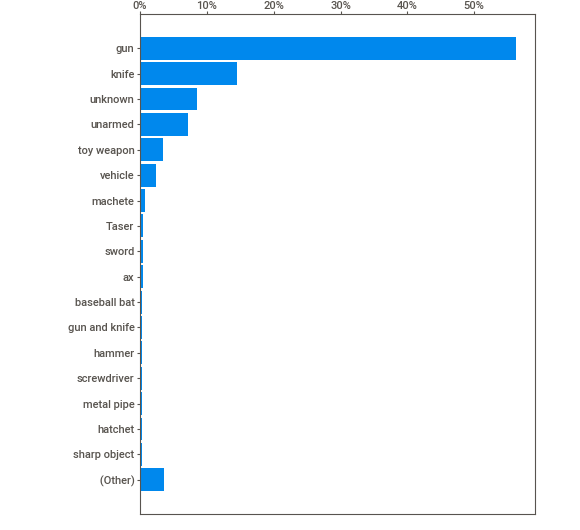
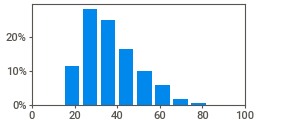
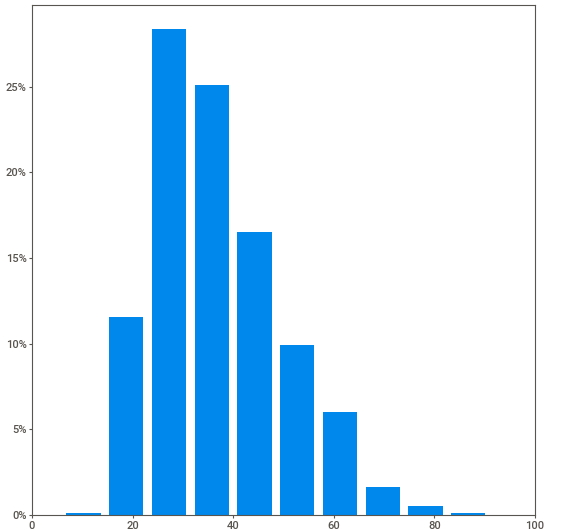
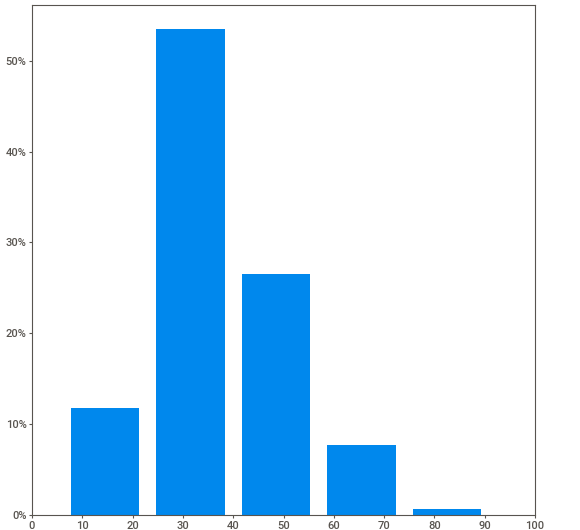
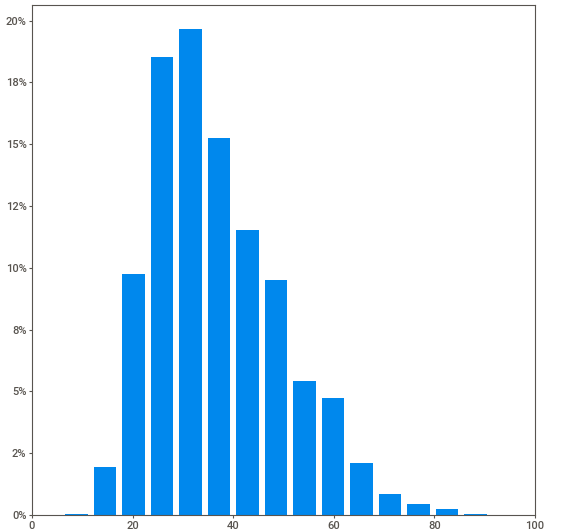
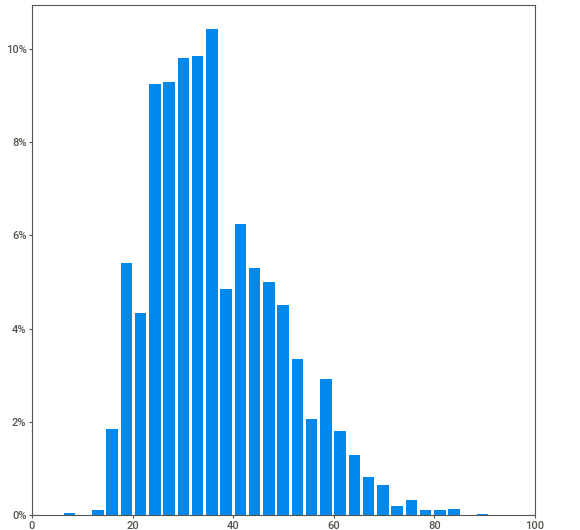
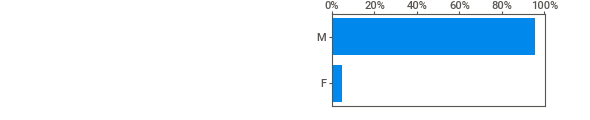
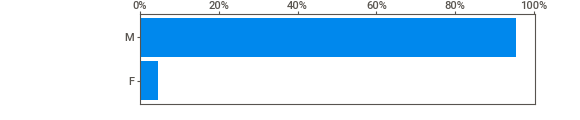
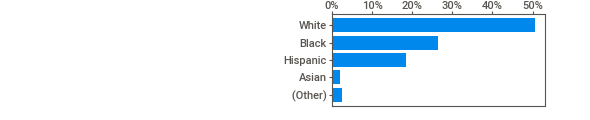
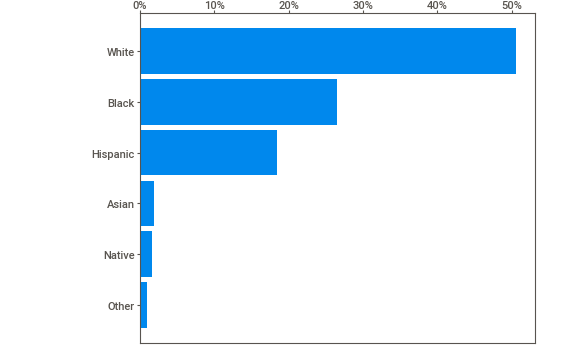
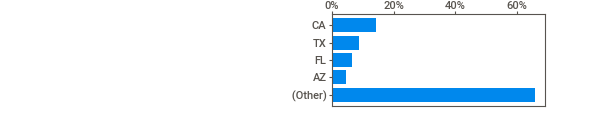
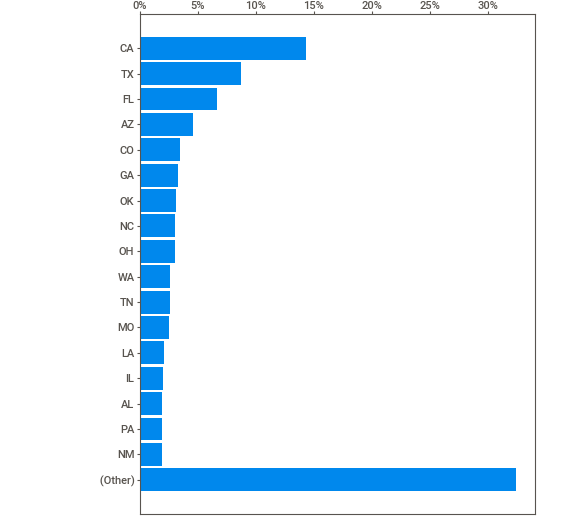
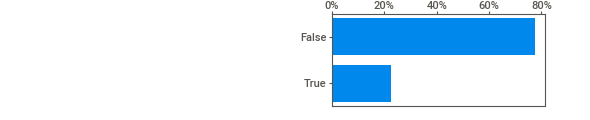
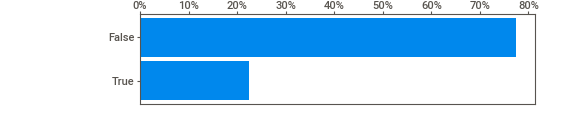
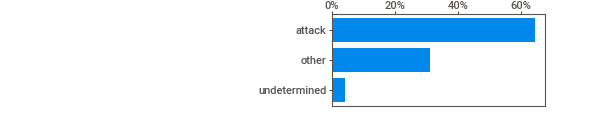
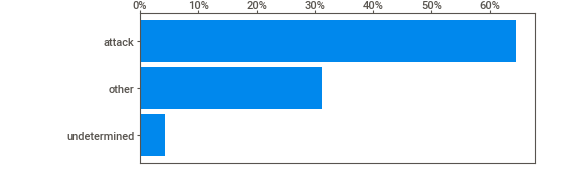
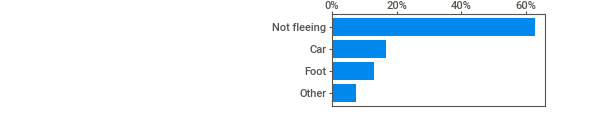
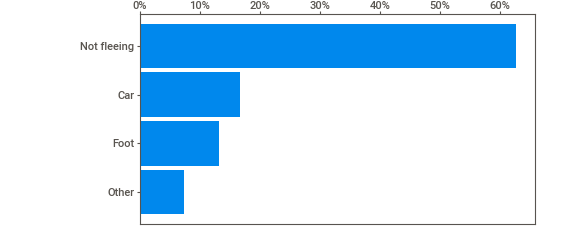
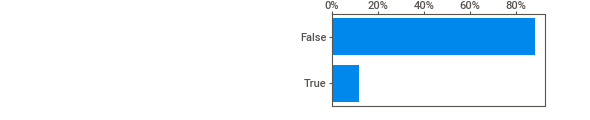
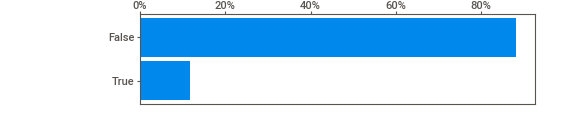
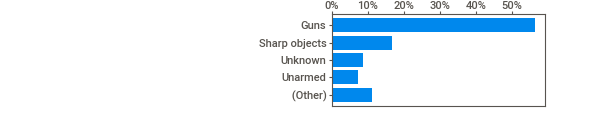
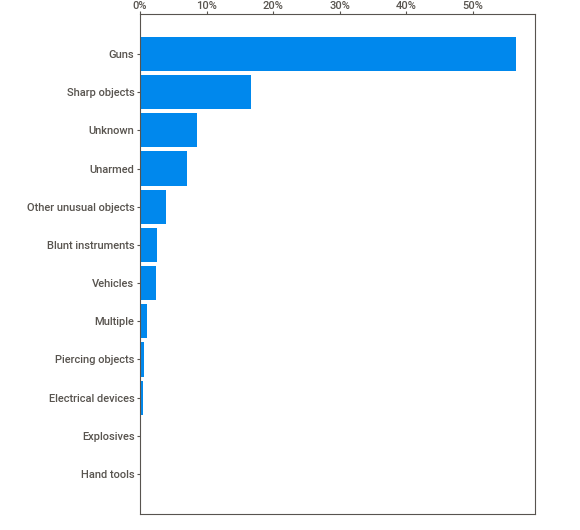
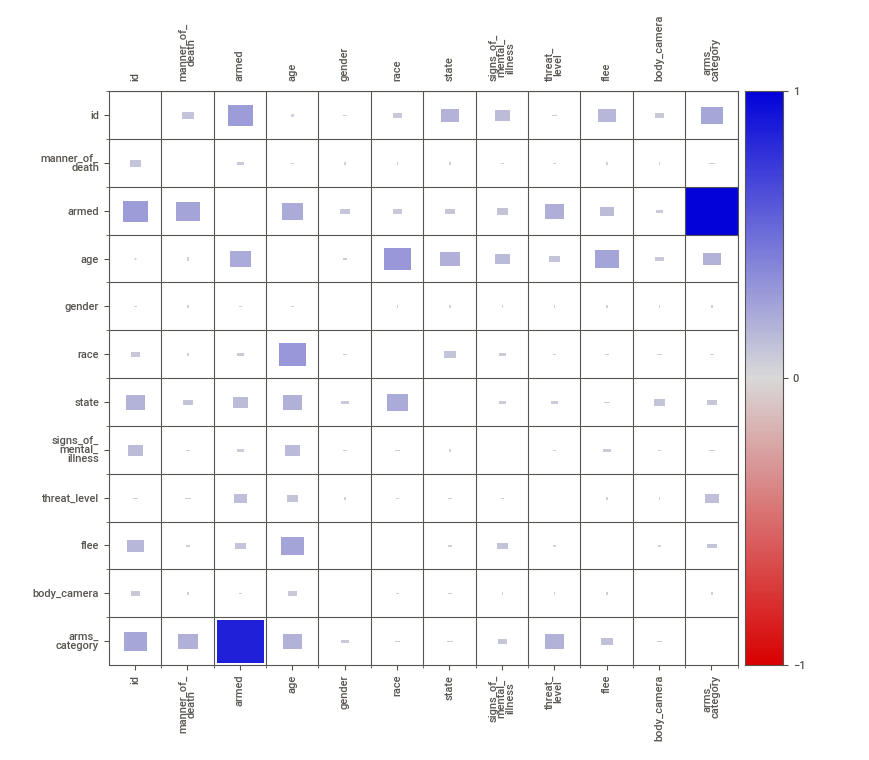
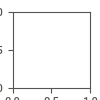

In [37]:
# displaying analysis 
IPython.display.HTML('shootings_analysis.html')

In [38]:
# Training and testing model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

x_train

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
498,1152,7/10/2015,shot,gun,25.0,M,Black,Chicago,IL,False,attack,Not fleeing,False,Guns
4005,4737,5/26/2019,shot,gun,30.0,M,Black,Kansas City,MO,False,attack,Foot,False,Guns
3611,4315,12/7/2018,shot,gun,16.0,M,Black,Columbus,OH,False,attack,Not fleeing,False,Guns
194,212,3/16/2015,shot,gun,28.0,M,White,St. Paul,MN,True,attack,Not fleeing,False,Guns
164,269,3/6/2015,shot,unarmed,37.0,M,Black,Aurora,CO,False,undetermined,Foot,False,Unarmed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,1867,9/7/2016,shot,knife,55.0,M,Black,Albany,GA,False,attack,Not fleeing,False,Sharp objects
2200,2554,5/3/2017,shot,gun,18.0,M,Black,Grand Rapids,MI,False,attack,Not fleeing,True,Guns
2342,2725,6/30/2017,shot,unarmed,23.0,M,White,Loveland,CO,False,attack,Foot,False,Unarmed
1570,1831,8/18/2016,shot,gun,59.0,M,White,McKinneyville,CA,True,attack,Not fleeing,False,Guns


In [39]:
x_test

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
3624,4296,12/11/2018,shot,gun,27.0,F,Black,Calhoun,GA,False,attack,Not fleeing,False,Guns
1411,1638,6/20/2016,shot and Tasered,knife,20.0,M,White,Lake Havasu City,AZ,False,other,Not fleeing,True,Sharp objects
215,311,3/21/2015,shot,gun,60.0,M,White,Harmony,IN,True,attack,Not fleeing,False,Guns
2428,2822,7/28/2017,shot,gun,31.0,M,Black,Kansas City,MO,False,attack,Not fleeing,False,Guns
4297,5095,10/12/2019,shot,machete,57.0,M,Hispanic,North Port,FL,False,attack,Not fleeing,False,Sharp objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,4030,9/14/2018,shot,gun,46.0,M,Black,Detroit,MI,False,attack,Not fleeing,True,Guns
3839,4555,3/10/2019,shot,unknown,31.0,M,Asian,San Bernardino,CA,True,attack,Not fleeing,False,Unknown
3493,4089,10/11/2018,shot,knife,22.0,M,Black,West Jordan,UT,False,other,Other,False,Sharp objects
1468,1699,7/7/2016,shot,gun,63.0,M,Black,Selma,AL,False,attack,Not fleeing,True,Guns


In [40]:
# Comparing dataset, train and test
compare_report = sv.compare([x_train, 'Train'], [x_test, 'Test'])
compare_report.show_html('shootings_comparison.html', open_browser = False)

                                             |          | [  0%]   00:00 -> (? left)

Report shootings_comparison.html was generated.



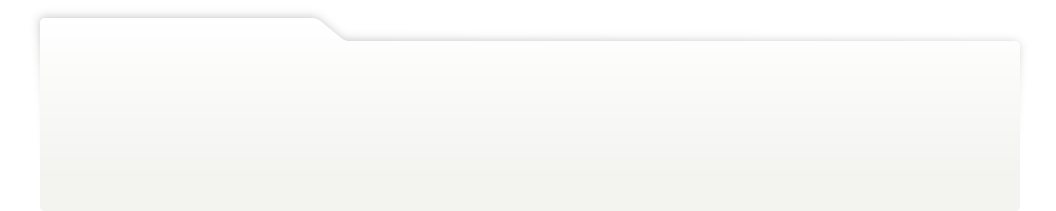
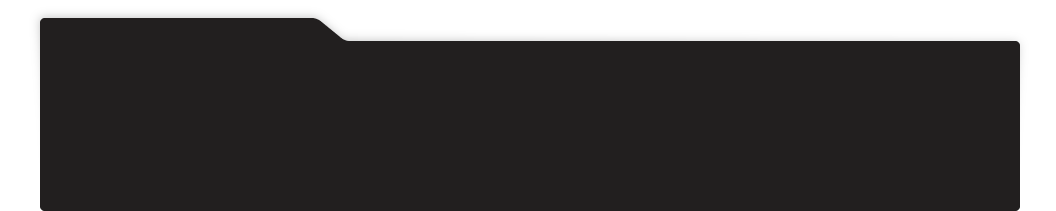
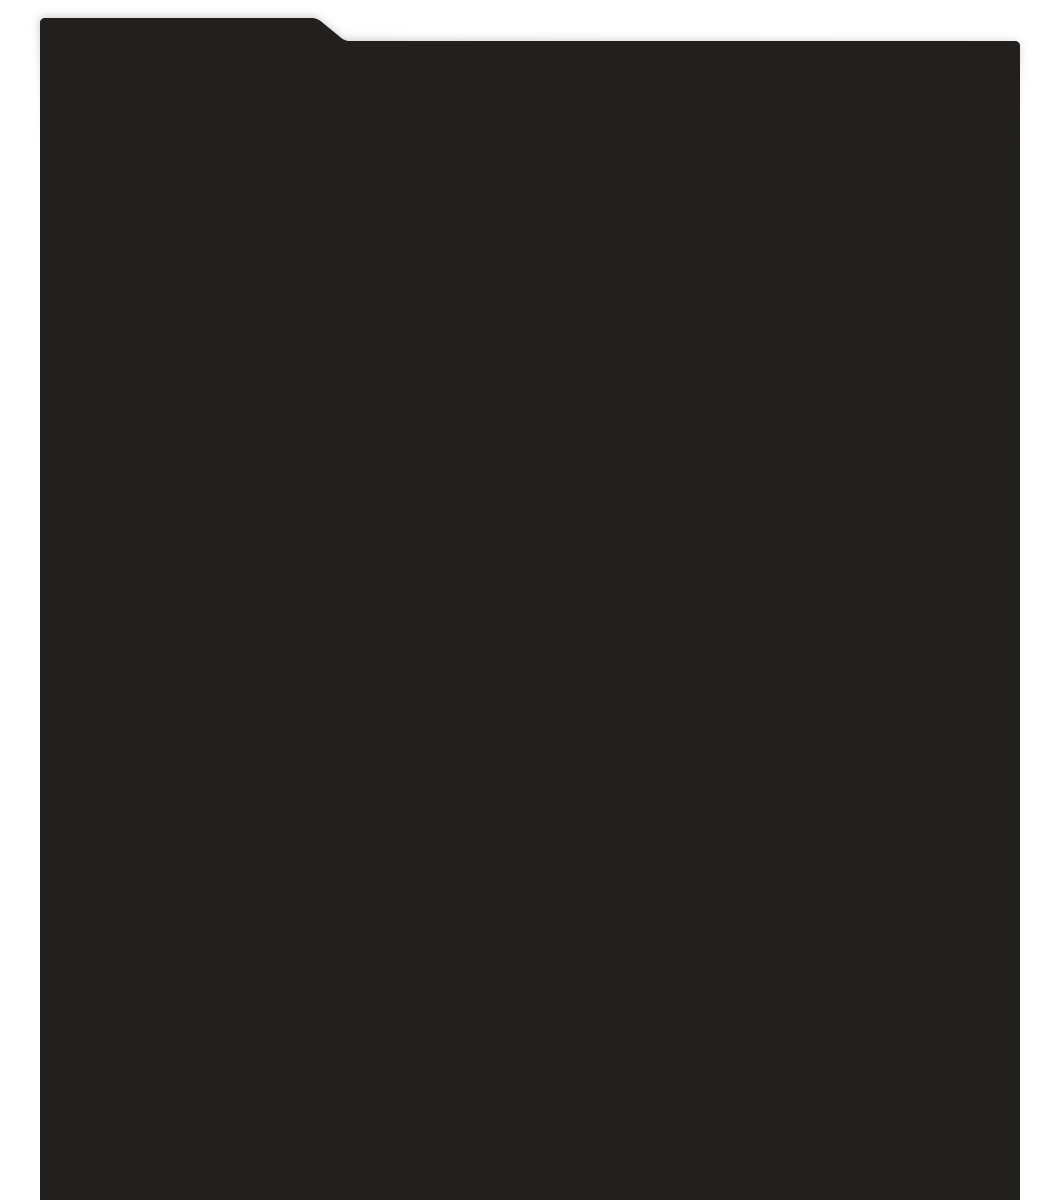
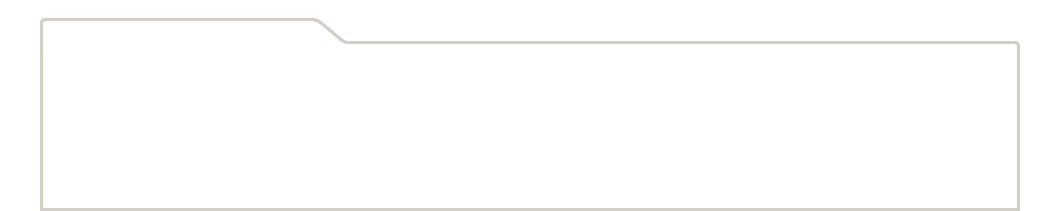
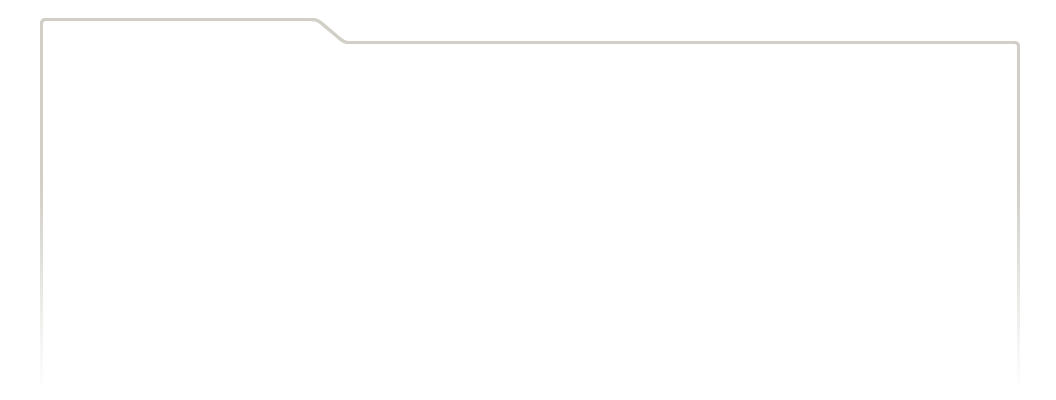
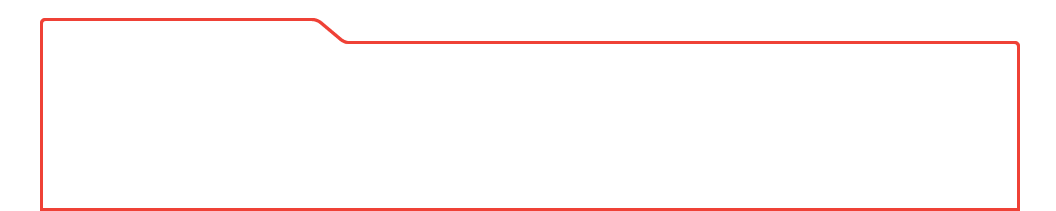
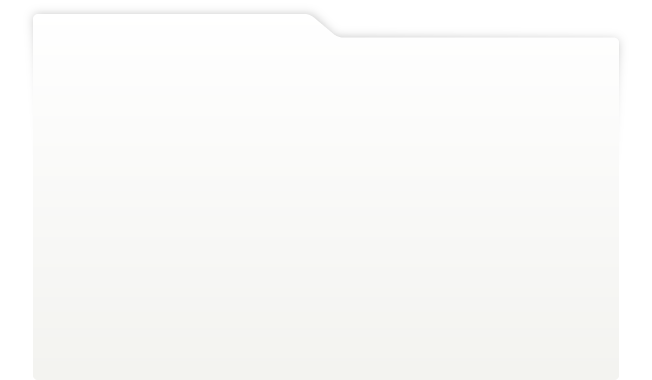
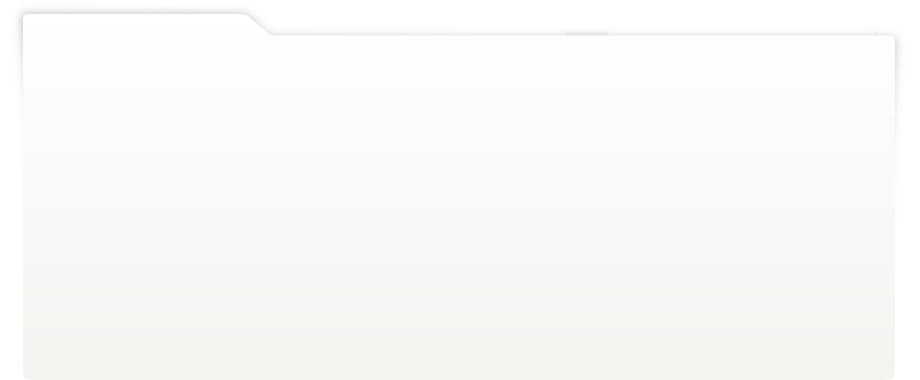
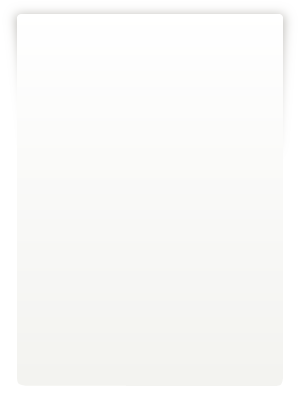
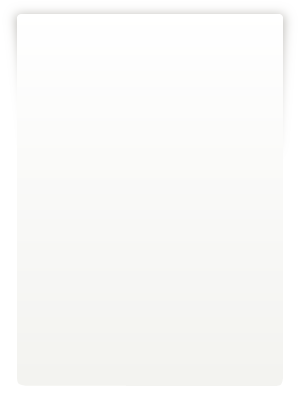
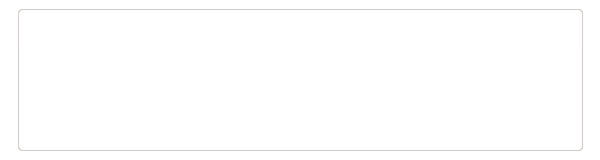
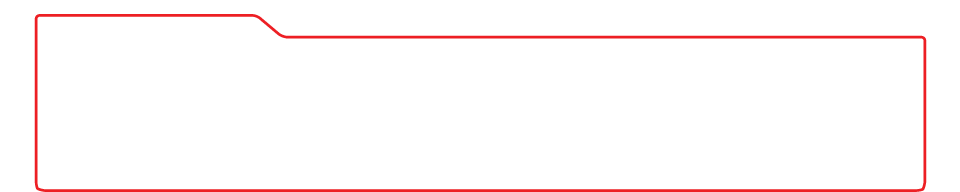
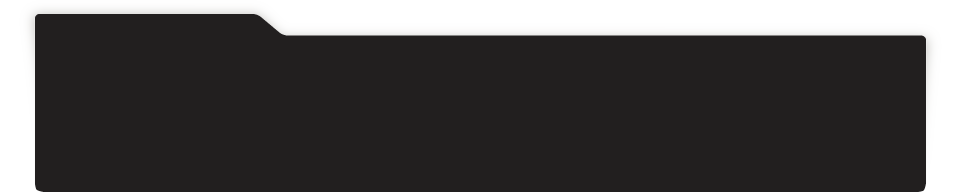
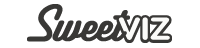
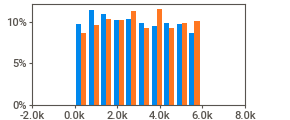
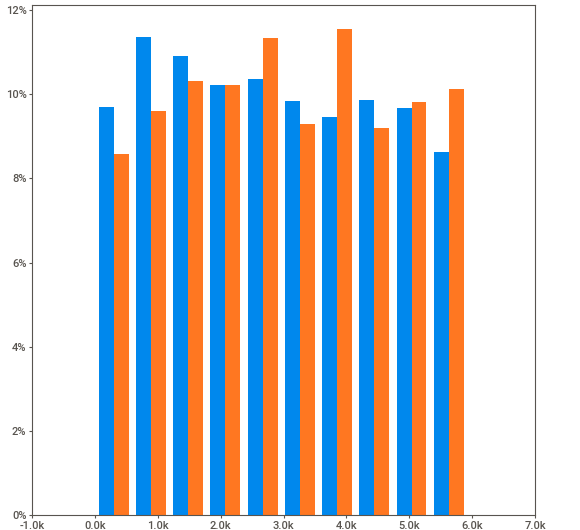
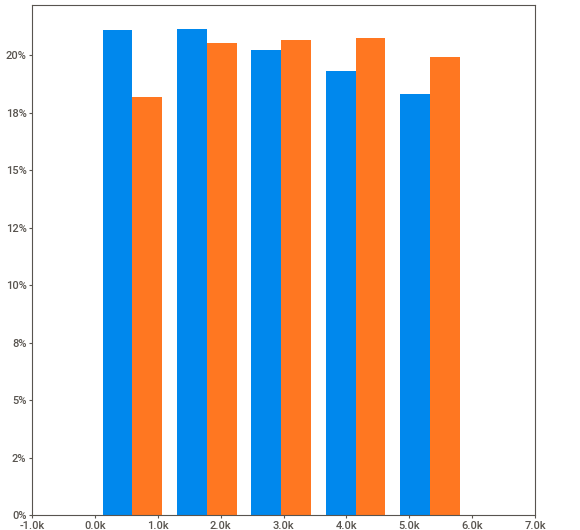
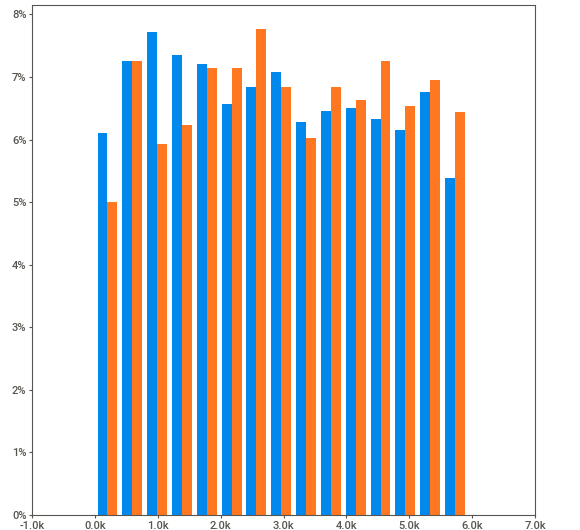
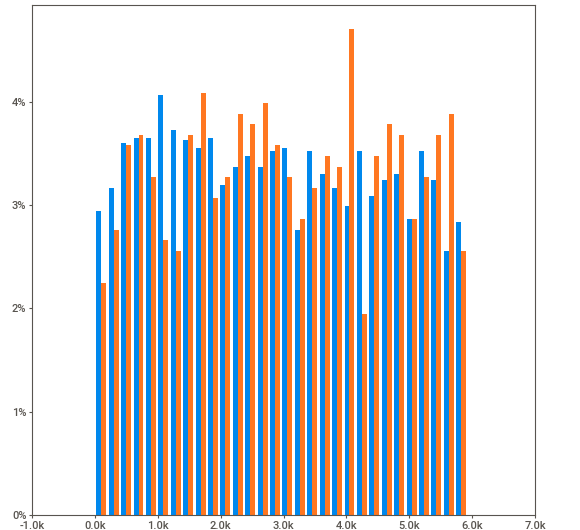
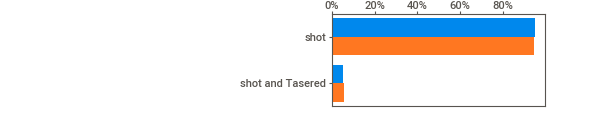
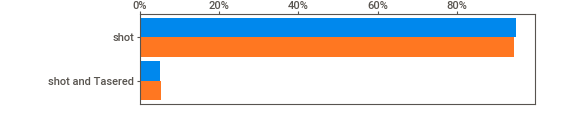
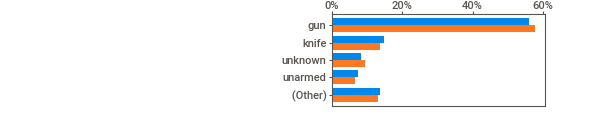
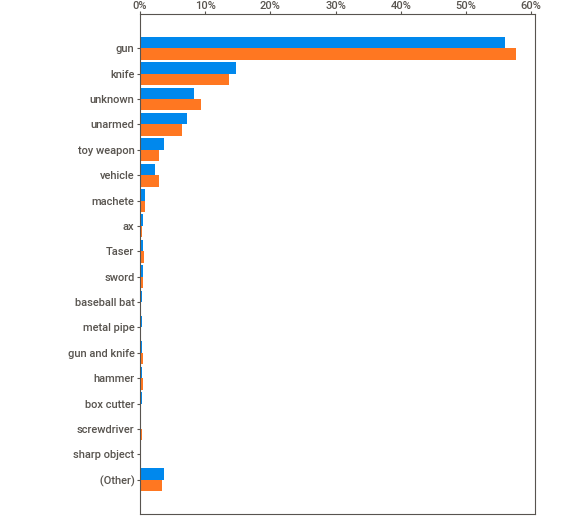
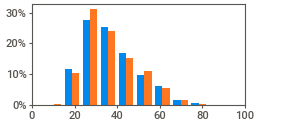
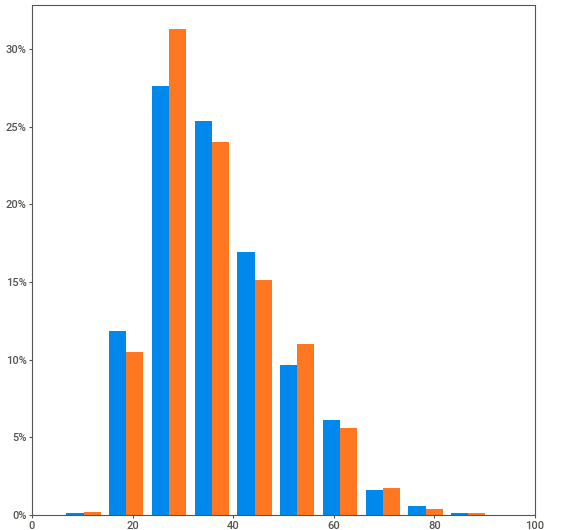
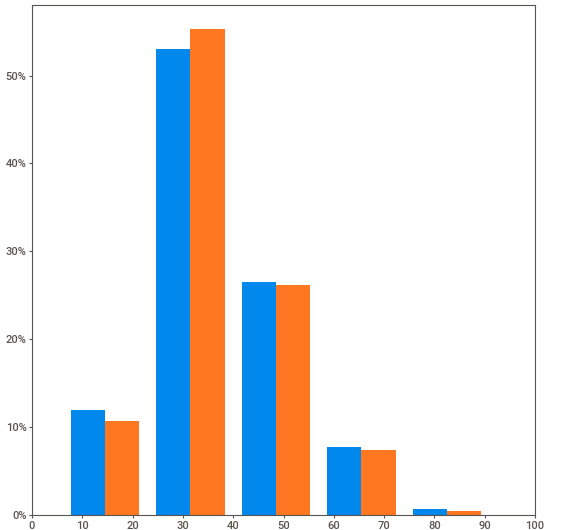
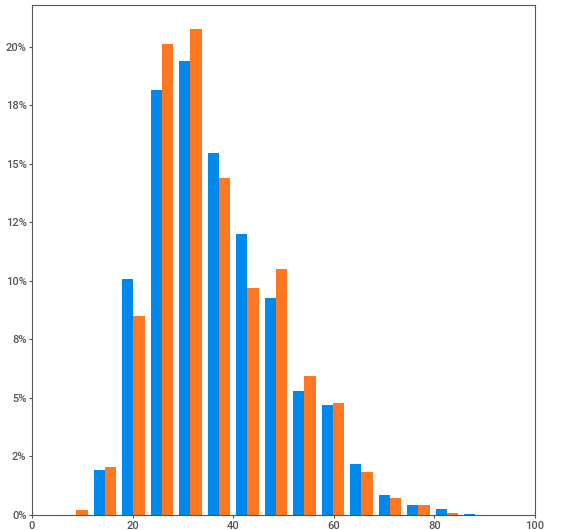
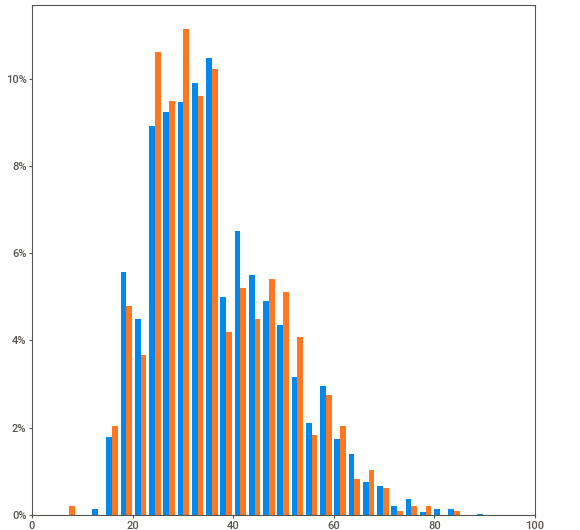
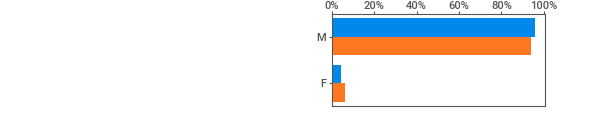
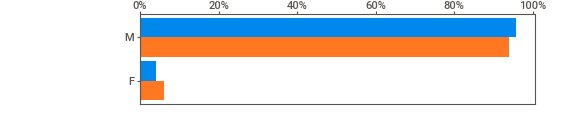
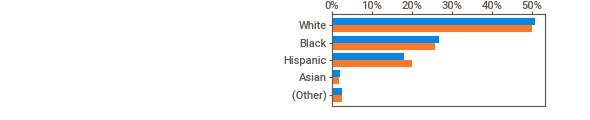
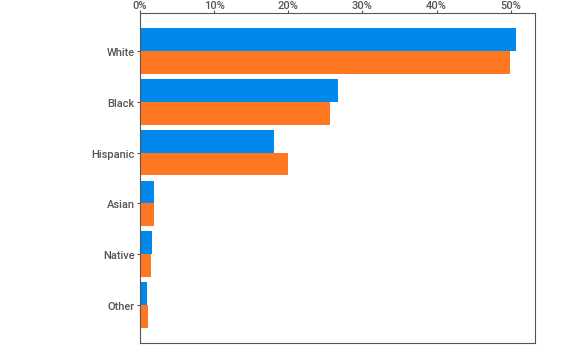
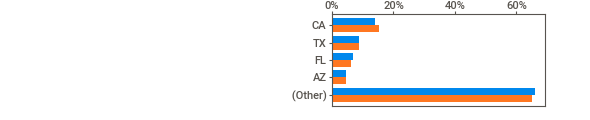
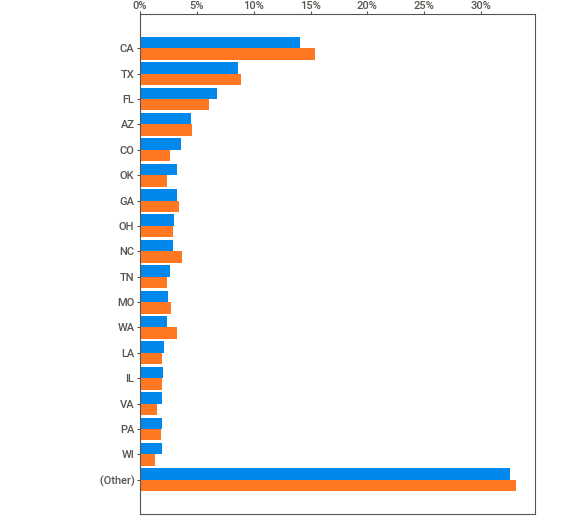
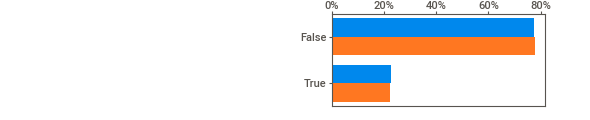
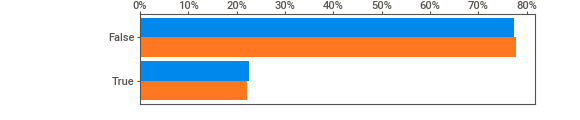
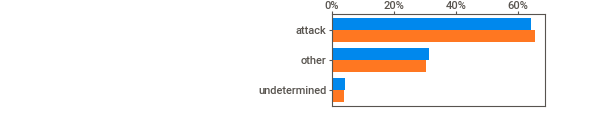
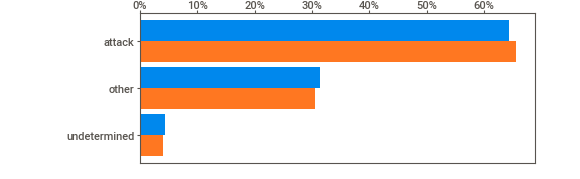
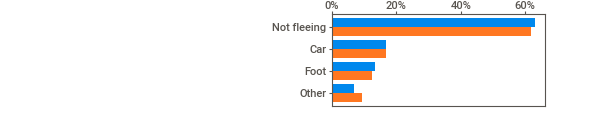
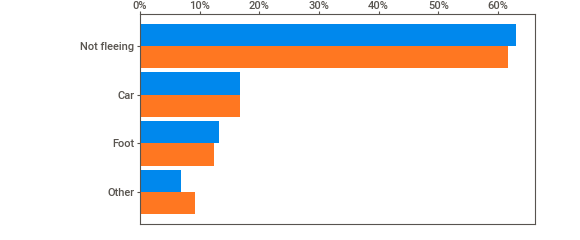
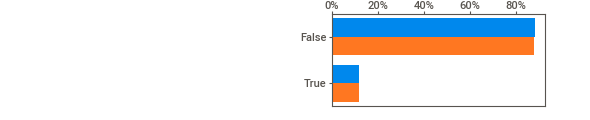
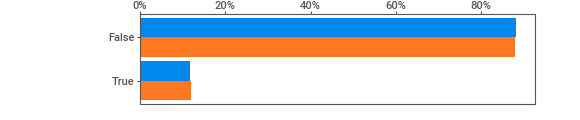
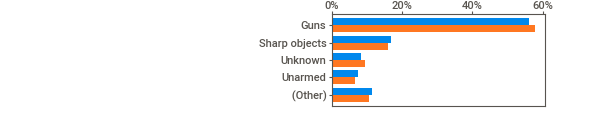
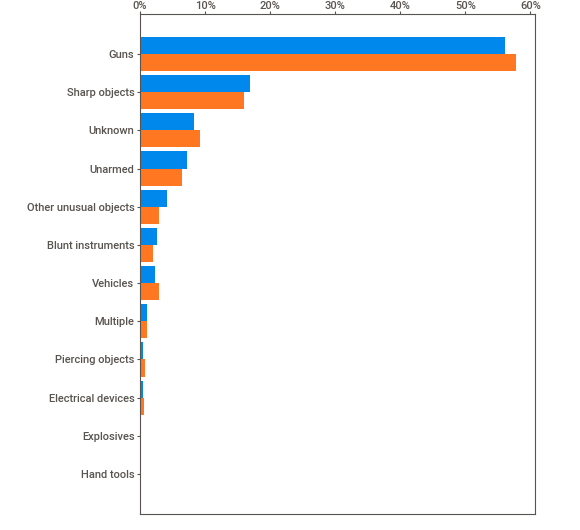
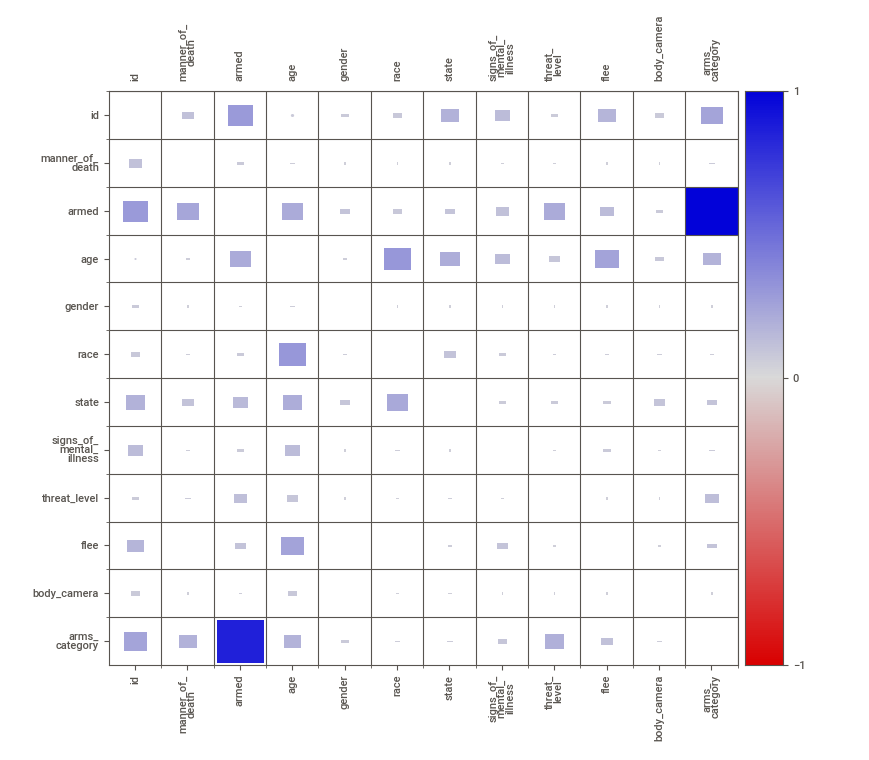
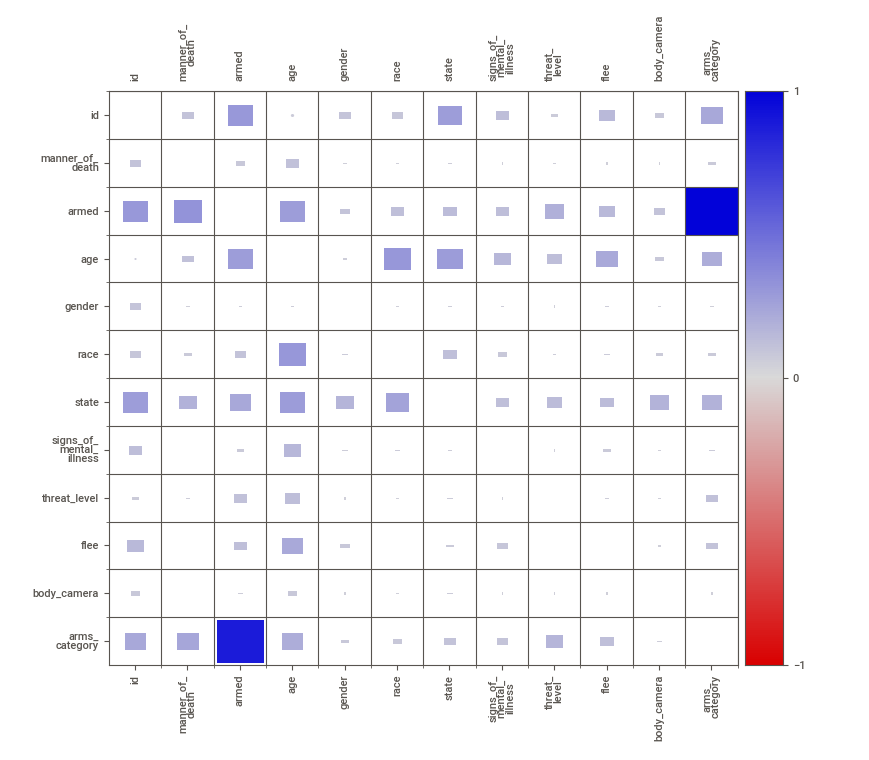

In [41]:
IPython.display.HTML('shootings_comparison.html')

In [50]:
#summary stats table transposed for df
shooting_data.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


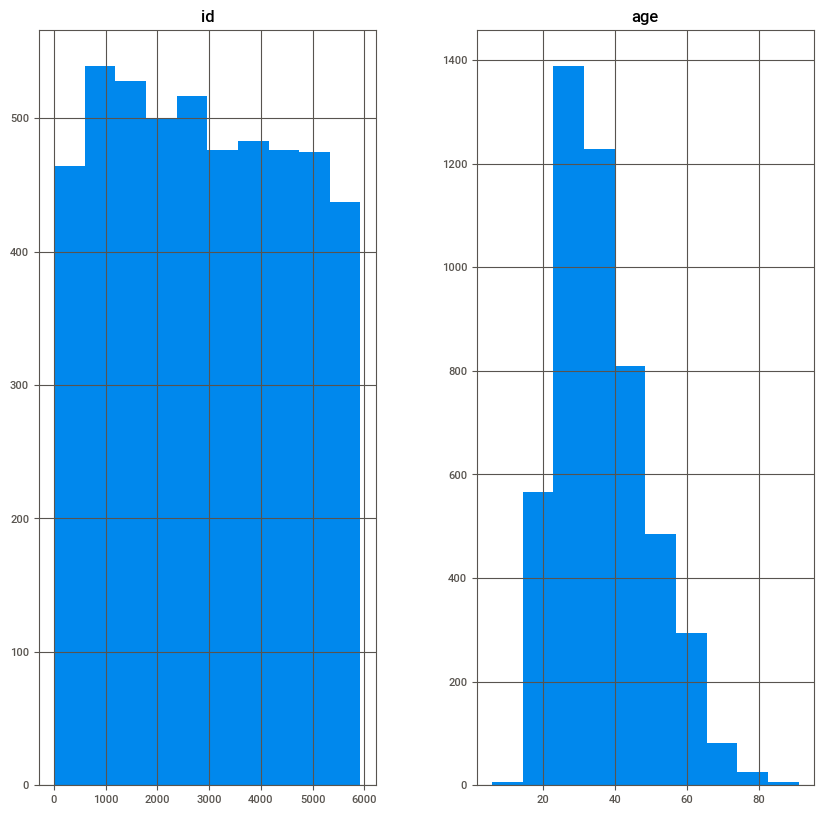

In [53]:
hist = shooting_data.hist(bins=10,figsize =(10,10))